In [23]:
%load_ext autoreload
%autoreload
%matplotlib inline
import rasterio
import sys
sys.path.insert(0, "..")
import src.satellite_analyze
import src.plot
from src.models.utils_pixpeak import detect_peaks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load you tiff file

In [4]:
# grab tif (put path to your tif)
tifffile = '/app/data/raw/athens/athens_satellite.tif'
ds_all = rasterio.open(tifffile)

# Specify some region to plot

In [21]:
# select subset for plotting
r_start = ds_all.height // 2
c_start = ds_all.width // 2
delta = 400
r_end = r_start + delta
c_end = c_start + delta

# Plot it

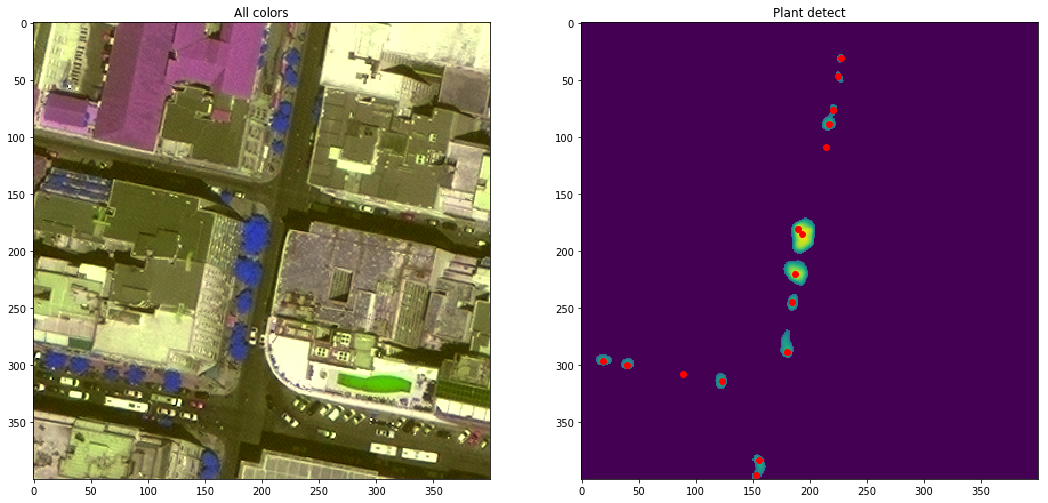

In [22]:
# get the band data
band_data = src.satellite_analyze.get_satellite_subset(ds_all, 
                                                       r_start, 
                                                       r_end, 
                                                       c_start, 
                                                       c_end,
                                                       norm=1)
# get tree data
plant_data = src.satellite_analyze.get_tree_finder_image(band_data)
# get peaks
trees_local = detect_peaks(plant_data)
# set color bands to r, g, IR
my_color_bands = [0,1,3]
# plot it
src.plot.plot_satellite_image((255*band_data).astype(int),
                              plant_data,
                              plot_all=False,
                              tree_loc=trees_local,
                              colorbands=my_color_bands)